In [25]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


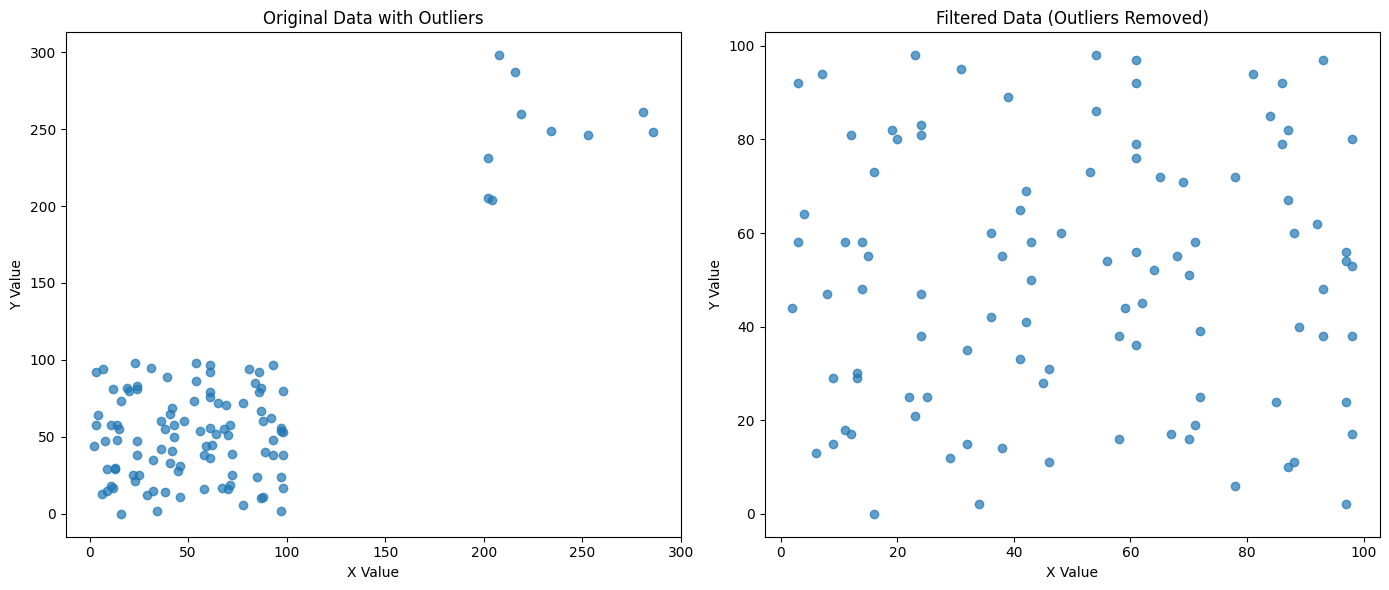

110
100


In [47]:
import numpy as np
import matplotlib.pyplot as plt

# 100개의 2차원 랜덤 데이터 생성
data = np.random.randint(100, size=(100, 2))  # 각 데이터 포인트는 2차원
outliers = np.random.randint(200,300, size=(10, 2)) # 10개 이상치 추가
data = np.vstack([data, outliers])

# Z-점수 계산 함수 (2차원 데이터용)
def calculate_z_scores_2d(data):
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    z_scores = (data - means) / stds
    return z_scores

# 이상치 제거 함수 (2차원 데이터용)
def remove_outliers_2d(data, threshold=2):
    z_scores = calculate_z_scores_2d(data)
    return np.array([data[i] for i in range(len(data)) if np.all(np.abs(z_scores[i]) <= threshold)])

# 이상치 제거 실행 (2차원 데이터용)
filtered_data = remove_outliers_2d(data)

# 이상치를 포함한 원본 데이터와 이상치가 제거된 데이터의 산점도
plt.figure(figsize=(14, 6))

# 원본 데이터의 산점도
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], alpha=0.7, label='Original Data')
plt.title('Original Data with Outliers')
plt.xlabel('X Value')
plt.ylabel('Y Value')

# 이상치가 제거된 데이터의 산점도
plt.subplot(1, 2, 2)
plt.scatter(filtered_data[:, 0], filtered_data[:, 1], alpha=0.7, label='Filtered Data')
plt.title('Filtered Data (Outliers Removed)')
plt.xlabel('X Value')
plt.ylabel('Y Value')

plt.tight_layout()
plt.show()


print(len(data))
print(len(filtered_data))


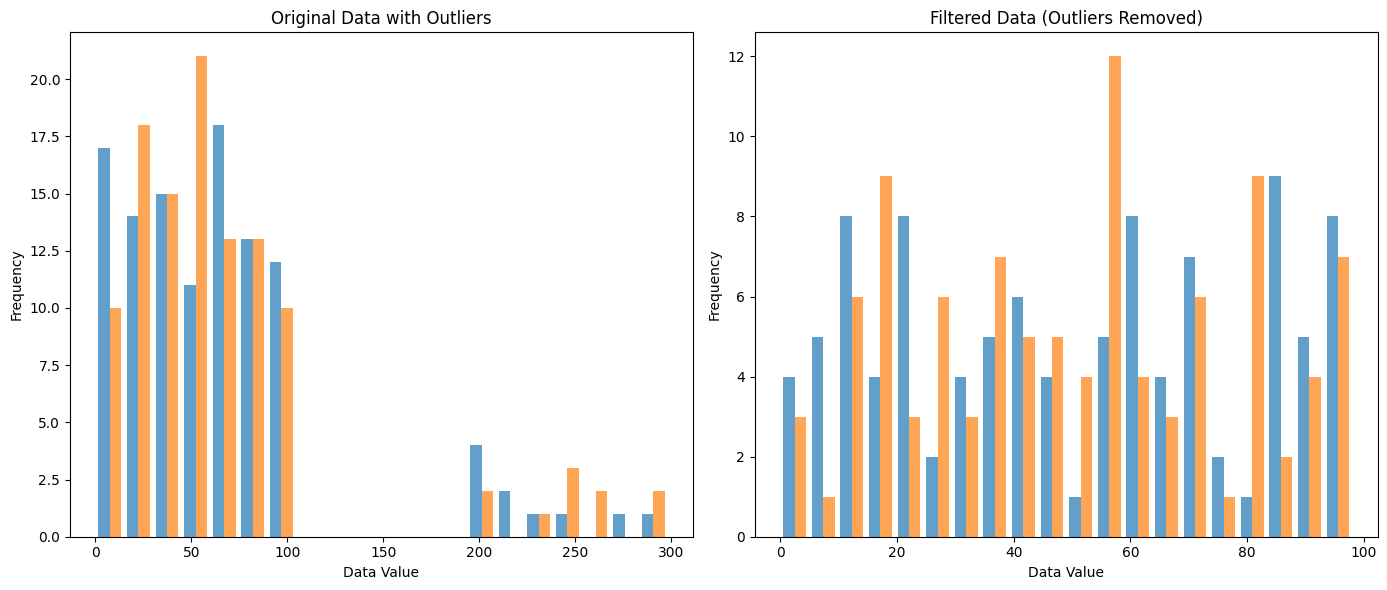

In [48]:
# 이상치를 포함한 원본 데이터와 이상치가 제거된 데이터의 히스토그램
plt.figure(figsize=(14, 6))

# 원본 데이터의 히스토그램
plt.subplot(1, 2, 1)
plt.hist(data, bins=20, alpha=0.7, label='Original Data')
plt.title('Original Data with Outliers')
plt.xlabel('Data Value')
plt.ylabel('Frequency')

# 이상치가 제거된 데이터의 히스토그램
plt.subplot(1, 2, 2)
plt.hist(filtered_data, bins=20, alpha=0.7, label='Filtered Data')
plt.title('Filtered Data (Outliers Removed)')
plt.xlabel('Data Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [51]:
# K-평균 클러스터링 실행
kmeans = KMeans(n_clusters=1)  # 클러스터의 수를 3으로 설정
kmeans.fit(filtered_data)
labels = kmeans.labels_

/home/donghoon/anaconda3/envs/dt_bot/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


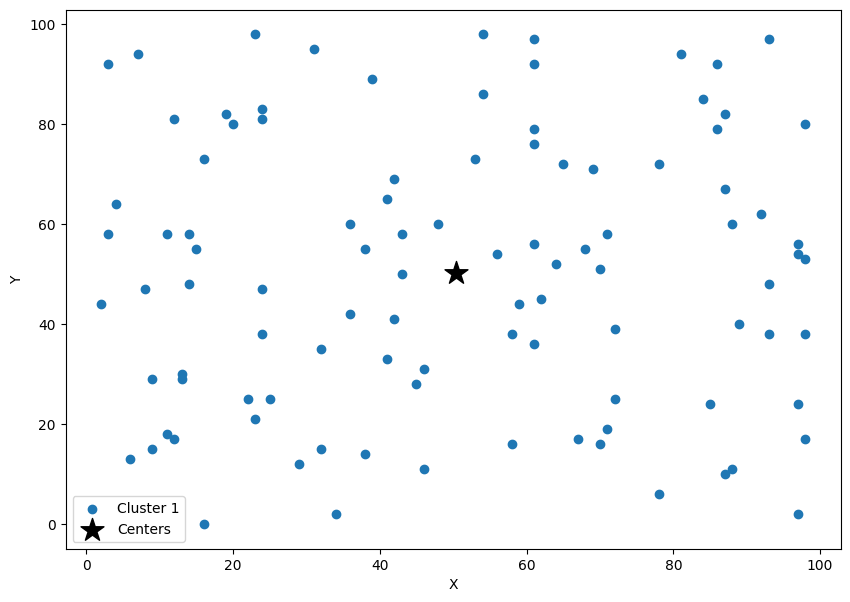

[[50.42 50.24]]


In [61]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

# 각 클러스터링 된 데이터 포인트를 다른 색으로 표시
for i in range(kmeans.n_clusters):
    ax.scatter(filtered_data[labels == i][:, 0], filtered_data[labels == i][:, 1], label=f'Cluster {i+1}')

# 클러스터 중심점 표시
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], s=300, c='black', label='Centers', marker='*')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()
print(centers)

In [64]:
# 파일 경로 지정
file_path = './data.txt'
# 배열을 텍스트 파일에 추가 모드로 쓰기
with open(file_path, 'a') as file:
    for row in centers:
        row_str = ' '.join(map(str, row))  # 각 행을 문자열로 변환하여 공백으로 구분하여 합침
        file.write(row_str + '\n')